In [ ]:
import pandas as pd


data_path = '/content/IBM-HR-Analytics-Employee-Attrition-and-Performance.csv'
data = pd.read_csv(data_path)


data.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
data.shape

(1470, 35)

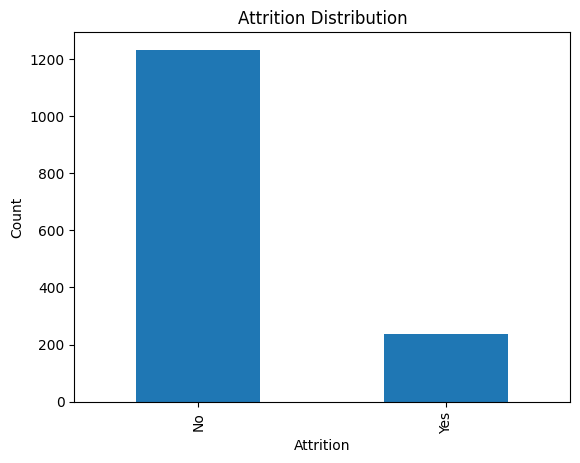

In [ ]:
import matplotlib.pyplot as plt
bar_plot=data.Attrition.value_counts().plot(kind='bar')
plt.title("Attrition Distribution")
plt.xlabel("Attrition")
plt.ylabel("Count")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


missing_values = data.isnull().sum()


label_encoder = LabelEncoder()
data['Attrition'] = label_encoder.fit_transform(data['Attrition'])


categorical_cols = data.select_dtypes(include=['object']).columns
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)


X = data_encoded.drop('Attrition', axis=1)
y = data_encoded['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape, missing_values


((1176, 47),
 (294, 47),
 (1176,),
 (294,),
 Age                         0
 Attrition                   0
 BusinessTravel              0
 DailyRate                   0
 Department                  0
 DistanceFromHome            0
 Education                   0
 EducationField              0
 EmployeeCount               0
 EmployeeNumber              0
 EnvironmentSatisfaction     0
 Gender                      0
 HourlyRate                  0
 JobInvolvement              0
 JobLevel                    0
 JobRole                     0
 JobSatisfaction             0
 MaritalStatus               0
 MonthlyIncome               0
 MonthlyRate                 0
 NumCompaniesWorked          0
 Over18                      0
 OverTime                    0
 PercentSalaryHike           0
 PerformanceRating           0
 RelationshipSatisfaction    0
 StandardHours               0
 StockOptionLevel            0
 TotalWorkingYears           0
 TrainingTimesLastYear       0
 WorkLifeBalance          

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

xgb_model= xgb.XGBClassifier(eval_metric='logloss',random_state=42)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
class_report = classification_report(y_test, y_pred)
print(f"Accuracy:{accuracy}")
print("confusion Matrix:")
print(class_report)

Confusion Matrix:
 [[246   9]
 [ 29  10]]
Accuracy:0.8707482993197279
confusion Matrix:
              precision    recall  f1-score   support

           0       0.89      0.96      0.93       255
           1       0.53      0.26      0.34        39

    accuracy                           0.87       294
   macro avg       0.71      0.61      0.64       294
weighted avg       0.85      0.87      0.85       294



In [ ]:
pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

xgb_model = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_resampled, y_train_resampled)

y_pred = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.8435374149659864
Confusion Matrix:
[[235  20]
 [ 26  13]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       255
           1       0.39      0.33      0.36        39

    accuracy                           0.84       294
   macro avg       0.65      0.63      0.64       294
weighted avg       0.83      0.84      0.84       294



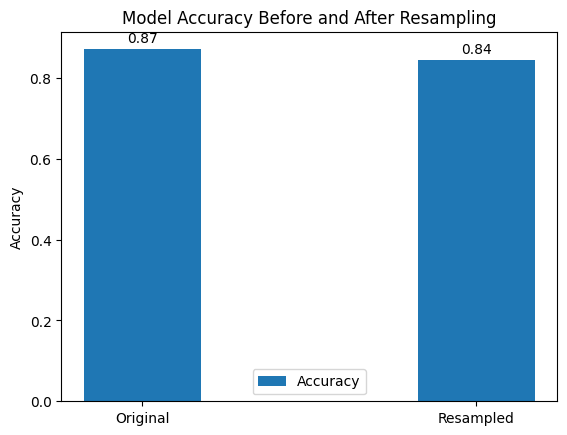

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['Original', 'Resampled']
accuracy_values = [0.8707, accuracy]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
bars = ax.bar(x, accuracy_values, width, label='Accuracy')

ax.set_ylabel('Accuracy')
ax.set_title('Model Accuracy Before and After Resampling')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Attach accuracy values on the top of each bar
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()
